# Coursera Capstone Project
## Battle of Neighbourhoods Week 1


### Description & Discussion of the Background

  Bangalore is one of the fast-growing cities in India where over 12 million people live and it has a population density of 4381 people per square kilo meter. As a resident of this city, I decided to use Bangalore in my project. People from different regions of India are thickly populated in Bangalore, especially from northern and southern regions of India. Due to is diversity in culture, the city needs to deal with diverse food items. There are many restaurants in Bangalore, each belonging to different categories like Northern, Southern, Chinese, Andhra, Kerala etc.
  As part of this project, I am analysing the data from Zomato Data set, where we can find the details of different restaurants in Bangalore. Here I am trying to identify the best neighbourhoods for getting the food of our choice. In this project, I am analysing the data based on the availability of Kerala foods, and the best restaurants and areas in Bangalore for getting it. Please note that we can select any category of food here including North, South, or the cuisine of your choice.

### Business Problem:

•	What is best location in Bangalore for Kerala Cuisine

•	Which areas have large number of Kerala Restaurant Market 

•	Which all areas have less number of Restaurant

•	Which is the best place to stay if I prefer Kerala Cuisine

•	What places are have best restaurant in Bangalore


### Interested Audience:

The question of best areas for food choices of interest is applicable to the all the people, especially for the ones who stayed in a different geographical region. With the diversity in culture, Bangalore become a major area where we need to find a solution for this question. Since the it is developed based on the Zomato dataset for Bngalore, the primary targeted audience are the people staying in Bangalore from different regions with different interest in food choices. Though this example is made based on Kerala cuisines, this can be used for the ones who choose different food choice.


### Loading Libraries

In [1]:
import numpy as np 
import time
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from pandas.io.json import json_normalize 

import requests 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.5.0 --yes 
import matplotlib.pyplot as plt
import folium 
from folium import plugins

import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

from sklearn.cluster import KMeans



print('Imported Libraries')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Imported Libraries


In [ ]:
! pip install geocoder
import geocoder

In [ ]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Section

For this project we need the following data:
1. Zomato data set that contains the details for restaurants in Bangalore and the ratings.
* Data Source: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants
* Description: This data set contains the required information. And we will use this data set to explore various neighborhoods of Bangalore.

2. Kerala restaurants in Bangalore neighborhood.
* Data Source: Foursquare API
* Description: By using this API we will get all the venues in bangalore. We can filter these venues to get only Kerala restaurants.

### Approach

    Collect the Bangalore Zomato data from https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants
    * Using Foursquare API we will get all venues for each neighborhood.
    * Filter out all venues which are Kerala Restaurants.
    * Data Visualization and some statistical analysis.
    * Analysing using Clustering (Specially K-Means):
    1. Find the best value of K
    2. Visualize the neighborhood with number of Kerala Restaurants.
 

### Load Zomato data set downloaded from Zomato

In [125]:
blr_data = pd.read_csv('zomato.csv')

In [202]:
blr_data.head()
print(blr_data.shape)

(43780, 6)


### List the various cuisines available in Zomato dataset for Bangalore

#### Just to start with Data Preprocessing, getting the details of various cuisines available for Bangalore Zomato Data Set

In [203]:
blr_data.cuisines.value_counts()
#blr_data.rest_type.value_counts()

North Indian                                                                            2284
North Indian, Chinese                                                                   2036
South Indian                                                                            1320
Cafe                                                                                     653
Bakery, Desserts                                                                         644
Biryani                                                                                  632
South Indian, North Indian, Chinese                                                      601
Fast Food                                                                                580
Desserts                                                                                 572
Chinese                                                                                  449
Bakery                                                                

### Data Preprocessing

In [128]:
blr_data.drop(columns=['url', 'address','phone','listed_in(city)','dish_liked', 'approx_cost(for two people)','menu_item','listed_in(type)','reviews_list','online_order','book_table'], inplace  =True)


In [129]:
blr_data.dropna(inplace=True)
blr_data.shape

(43780, 6)

In [204]:
#north_data=blr_data[blr_data['cuisines'].str.contains("North Indian")]
north_data=blr_data[blr_data['cuisines'].str.contains("Kerala")]
north_data.shape

(1265, 6)

In [205]:
north_data.columns

Index(['name', 'rate', 'votes', 'location', 'rest_type', 'cuisines'], dtype='object')

In [206]:
north_data.shape

(1265, 6)

In [207]:
north_data.head()

,name,rate,votes,location,rest_type,cuisines
930,Empire Restaurant,3.6/5,113,JP Nagar,"Takeaway, Delivery","Kerala, Seafood, South Indian, Chinese, North ..."
944,Kitchens@JP Nagar,3.9/5,488,JP Nagar,"Takeaway, Delivery","Biryani, Kerala, Mughlai, Street Food, North I..."
972,Kuttanad,3.6/5,140,Bannerghatta Road,Quick Bites,"Kerala, South Indian"
1048,Veruthe Oru Thattukada,3.7/5,27,BTM,Quick Bites,"Kerala, South Indian"
1076,Seasons,3.8/5,500,Bannerghatta Road,Casual Dining,"North Indian, South Indian, Chinese, Seafood, ..."


## Methodology & Approach

### Approach
We use Zomato kaggel dataset Set for collecting the Bangalore restaurant data. We downloaded the dataset and use read_csv method to access the dataset and create dataframe from it. We use Geocoder for getting the lattitude and Longitudes of all the locations received from the data set. We added the Lattitude and longitude information for all the locations to the original data from by connecting it with location field. Using FourSquare API we find all venues for each neighborhood and 
Filter out all venues that are nearby by locations. We Plot the data in bars using mathplotlib, for displaying the top ten highest rated Kerala restaurants area in Bangalore.

We use aggregative rating for each resturant to find the best places for Kerala restaurants.Visualize the Ranking of neighborhoods in Maps using folium library.

### Modeling

We use KMeans Clustering Model  to group the neighbourhood restaurants into five clusters . We use GeoCoder to get Geocode for all the locations listed in the Dataset. We mapped it to the original data frame using location identifier.

### Locationwise Restaurant details

Text(0.5, 1.0, 'Locationwise Restaurants')

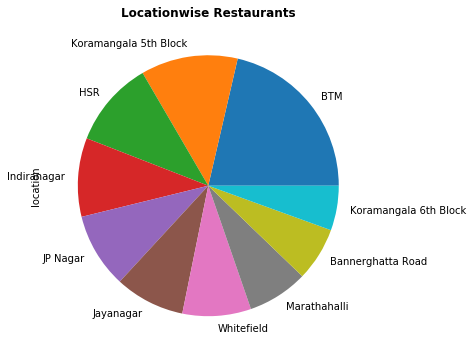

In [208]:
north_data.location.value_counts().head()
plt.figure(figsize=(12,6)) 
blr_data['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Locationwise Restaurants', weight = 'bold')

In [374]:
north_data['Latitude'] = 0.000000
north_data['Longitude'] = 0.000000
north_data['Cluster'] = 0
north_data['Aggregate rating'] = 0.0
north_data.head()

,name,rate,votes,location,rest_type,cuisines,Latitude,Longitude,Cluster,Aggregate rating
930,Empire Restaurant,3.6/5,113,JP Nagar,"Takeaway, Delivery","Kerala, Seafood, South Indian, Chinese, North ...",0.0,0.0,0,0.0
944,Kitchens@JP Nagar,3.9/5,488,JP Nagar,"Takeaway, Delivery","Biryani, Kerala, Mughlai, Street Food, North I...",0.0,0.0,0,0.0
972,Kuttanad,3.6/5,140,Bannerghatta Road,Quick Bites,"Kerala, South Indian",0.0,0.0,0,0.0
1048,Veruthe Oru Thattukada,3.7/5,27,BTM,Quick Bites,"Kerala, South Indian",0.0,0.0,0,0.0
1076,Seasons,3.8/5,500,Bannerghatta Road,Casual Dining,"North Indian, South Indian, Chinese, Seafood, ...",0.0,0.0,0,0.0


In [210]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="locations")
location = geolocator.geocode("Banashankari")
print(location.address)
print((location.latitude, location.longitude))

Banashankari, Badami taluku, Bagalkote district, Karnataka, 587200, India
(15.8876779, 75.7046777)


### Create Aggregate Rating 

In [227]:
for x in north_data.index:
    north_data['Aggregate rating'][x] = north_data['rate'][x].replace('/5','')

north_data['Aggregate rating'] = pd.to_numeric(north_data['Aggregate rating'], errors='coerce')
north_data.dropna(inplace=True)
north_data.head(500)

,name,rate,votes,location,rest_type,cuisines,Latitude,Longitude,Cluster,Aggregate rating
930,Empire Restaurant,3.6/5,113,JP Nagar,"Takeaway, Delivery","Kerala, Seafood, South Indian, Chinese, North ...",12.265594,76.646540,0,3.6
944,Kitchens@JP Nagar,3.9/5,488,JP Nagar,"Takeaway, Delivery","Biryani, Kerala, Mughlai, Street Food, North I...",12.265594,76.646540,0,3.9
972,Kuttanad,3.6/5,140,Bannerghatta Road,Quick Bites,"Kerala, South Indian",12.857693,77.588953,0,3.6
1048,Veruthe Oru Thattukada,3.7/5,27,BTM,Quick Bites,"Kerala, South Indian",12.911276,77.604565,0,3.7
1076,Seasons,3.8/5,500,Bannerghatta Road,Casual Dining,"North Indian, South Indian, Chinese, Seafood, ...",12.857693,77.588953,0,3.8
1145,Cucumber Town,4.2/5,306,BTM,Delivery,"Kerala, North Indian",12.911276,77.604565,0,4.2
1159,Deejas Kitchen,3.9/5,73,Bannerghatta Road,"Takeaway, Delivery","South Indian, Kerala",12.857693,77.588953,0,3.9
1215,Angel Restaurant,2.8/5,165,Bannerghatta Road,Quick Bites,"Kerala, South Indian, North Indian",12.857693,77.588953,0,2.8
1352,Oottupura Family Restaurant,3.4/5,224,Bannerghatta Road,Quick Bites,"Kerala, South Indian, Biryani",12.857693,77.588953,0,3.4
1435,Joon Restaurant,3.7/5,31,BTM,Quick Bites,"Arabian, Chinese, North Indian, Kerala, Juices",12.911276,77.604565,0,3.7


### Get Geocode for all the locations listed in the Dataset
##### Please ignore the time out error below, since we use only 1000 records from dataset for testing

In [275]:
#print(len(north_data))
geolocator = Nominatim(user_agent="locations")
for x in north_data.index:
    #print(north_data['location'][x])
    location = geolocator.geocode(north_data['location'][x])
    north_data['Latitude'][x] = location.latitude
    north_data['Longitude'][x] = location.longitude
north_data.head()

GeocoderTimedOut: Service timed out

In [280]:
north_data.head(1200)

,name,rate,votes,location,rest_type,cuisines,Latitude,Longitude,Cluster,Aggregate rating
930,Empire Restaurant,3.6/5,113,JP Nagar,"Takeaway, Delivery","Kerala, Seafood, South Indian, Chinese, North ...",12.265594,76.646540,1,3.6
944,Kitchens@JP Nagar,3.9/5,488,JP Nagar,"Takeaway, Delivery","Biryani, Kerala, Mughlai, Street Food, North I...",12.265594,76.646540,1,3.9
972,Kuttanad,3.6/5,140,Bannerghatta Road,Quick Bites,"Kerala, South Indian",12.857693,77.588953,1,3.6
1048,Veruthe Oru Thattukada,3.7/5,27,BTM,Quick Bites,"Kerala, South Indian",12.911276,77.604565,1,3.7
1076,Seasons,3.8/5,500,Bannerghatta Road,Casual Dining,"North Indian, South Indian, Chinese, Seafood, ...",12.857693,77.588953,1,3.8
1145,Cucumber Town,4.2/5,306,BTM,Delivery,"Kerala, North Indian",12.911276,77.604565,1,4.2
1159,Deejas Kitchen,3.9/5,73,Bannerghatta Road,"Takeaway, Delivery","South Indian, Kerala",12.857693,77.588953,1,3.9
1215,Angel Restaurant,2.8/5,165,Bannerghatta Road,Quick Bites,"Kerala, South Indian, North Indian",12.857693,77.588953,1,2.8
1352,Oottupura Family Restaurant,3.4/5,224,Bannerghatta Road,Quick Bites,"Kerala, South Indian, Biryani",12.857693,77.588953,1,3.4
1435,Joon Restaurant,3.7/5,31,BTM,Quick Bites,"Arabian, Chinese, North Indian, Kerala, Juices",12.911276,77.604565,1,3.7


### Getting Location Information for Bangalore

In [281]:
CLIENT_ID = 'OBGXDZRUTDDMHB1OQTS2HBHB25ESFWS3ILFK0XKX1N0QQI33'
CLIENT_SECRET = '2Y0EQ1YPHE2CQHZBHLAFE1LFZFOFNEDQ3EOPKEB5R2LD5IXZ'
VERSION = '20180604'

In [282]:
address = 'Bangalore'

geolocator = Nominatim(user_agent="Bangalore")
location = geolocator.geocode(address)
latitude_bangalore = location.latitude
longitude_bangalore = location.longitude
print('The geograpical coordinate of Bangalore are {}, {}.'.format(latitude_bangalore, longitude_bangalore))

The geograpical coordinate of Bangalore are 12.9791198, 77.5912997.


In [287]:
north_data.head()

,name,rate,votes,location,rest_type,cuisines,Latitude,Longitude,Cluster,Aggregate rating
930,Empire Restaurant,3.6/5,113,JP Nagar,"Takeaway, Delivery","Kerala, Seafood, South Indian, Chinese, North ...",12.265594,76.646540,1,3.6
944,Kitchens@JP Nagar,3.9/5,488,JP Nagar,"Takeaway, Delivery","Biryani, Kerala, Mughlai, Street Food, North I...",12.265594,76.646540,1,3.9
972,Kuttanad,3.6/5,140,Bannerghatta Road,Quick Bites,"Kerala, South Indian",12.857693,77.588953,1,3.6
1048,Veruthe Oru Thattukada,3.7/5,27,BTM,Quick Bites,"Kerala, South Indian",12.911276,77.604565,1,3.7
1076,Seasons,3.8/5,500,Bannerghatta Road,Casual Dining,"North Indian, South Indian, Chinese, Seafood, ...",12.857693,77.588953,1,3.8


In [284]:
Bangalore_Map = folium.Map(location=[latitude_bangalore, longitude_bangalore], zoom_start=12)

X = north_data['Latitude']
Y = north_data['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=4, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
north_data ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(north_data['Latitude'], north_data['Longitude'], north_data['location'], north_data['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Bangalore_Map)  

Bangalore_Map

## Best Rated Restaurants in Bangalore

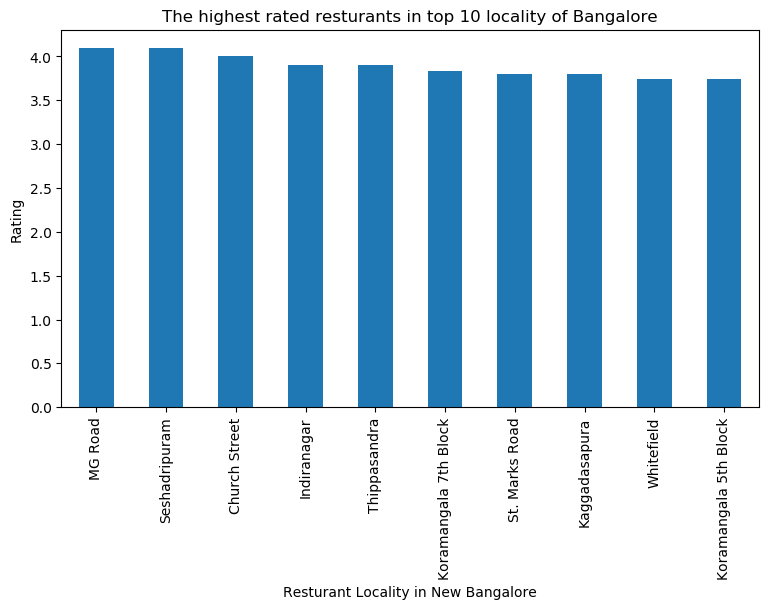

In [288]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturants areas in top 10 locality of Bangalore')
#On x-axis

#giving a bar plot
north_data.groupby('location')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Bangalore')
#On y-axis
plt.ylabel('Rating')
#displays the plot
plt.show()

### Worst Rated Restaurants in Bangalore

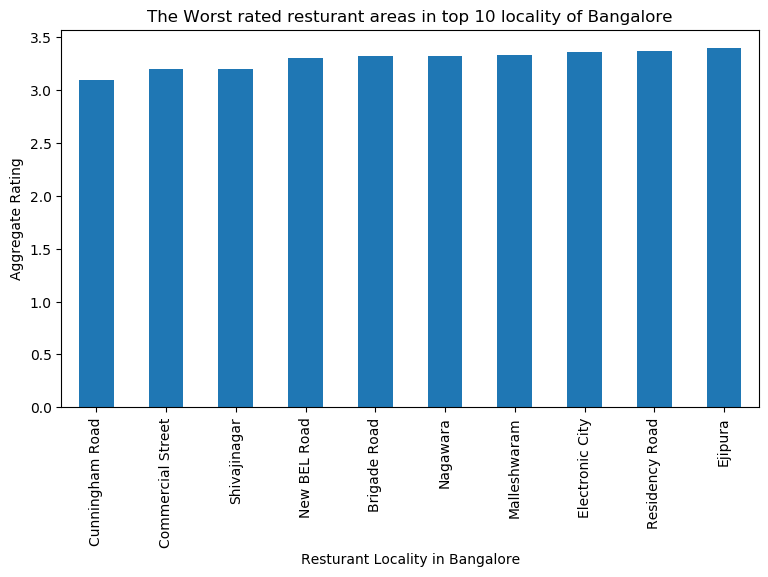

In [290]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant areas in top 10 locality of Bangalore')
#On x-axis

#giving a bar plot

north_data.groupby('location')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

### Import geocoder

### Best Places for Kearla restaurants in bangalore

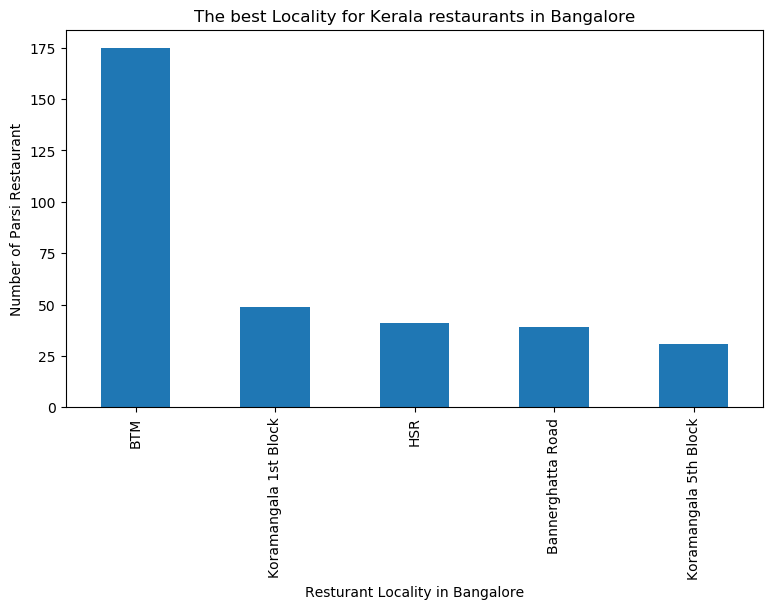

In [291]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Kerala restaurants in Bangalore')
#On x-axis

#giving a bar plot
north_data[north_data['cuisines'].str.startswith('Kerala')].groupby('location')['name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of Parsi Restaurant')

#displays the plot
plt.show()

### Best Places for Favourite restaurants in bangalore on Rating

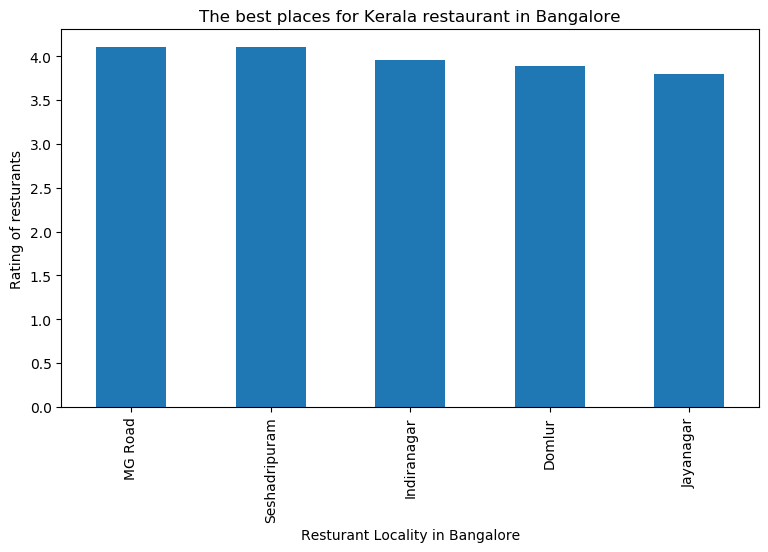

In [292]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Kerala restaurant in Bangalore')
#On x-axis

#giving a bar plot
north_data[north_data['cuisines'].str.startswith('Kerala')].groupby('location')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

## Data

In [340]:
df_Res_Loc =  north_data.groupby('location').count()['name'].to_frame()
df_Res_rating= north_data.groupby('location')['Aggregate rating'].mean().to_frame()
d_Cuisines = north_data.groupby(['location'])['cuisines'].agg(', '.join).reset_index()
d_R = north_data.groupby(['location'])['rate'].unique().agg(', '.join).reset_index()
d_V = north_data.groupby(['location'])['votes'].sum().to_frame()
d_Lat = north_data.groupby('location').mean()['Latitude'].to_frame()
d_Lng = north_data.groupby('location').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='location').merge(df_Res_Loc, on='location').merge(d_Cuisines, on='location').merge(df_Res_rating,on ='location').merge(d_R, on ='location').merge(d_V, on ='location')
null_locs = ['Bellandur', 'Church Street', 'Cunningham Road', 'HSR', 'Jayanagar', 'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Nagawara', 'Old Airport Road', 'Seshadripuram']
df_final.shape
df_final = df_final[~df_final.location.isin(null_locs)]
df_final.shape


(36, 8)

In [341]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['location','Latitude','Longitude', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head(100)

,location,Latitude,Longitude,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,BTM,12.911276,77.604565,239,"Kerala, South Indian, Kerala, North Indian, Ar...",3.654812,"3.7/5, 4.2/5, 2.9/5, 3.4/5, 3.9/5, 3.1/5, 4.1/...",45755
1,Banaswadi,13.014162,77.651854,16,"Kerala, Arabian, Kerala, North Indian, Chinese...",3.506250,"3.2/5, 3.4/5, 3.7/5, 3.8/5, 3.4 /5, 2.9 /5, 3....",1459
2,Bannerghatta Road,12.857692,77.588953,61,"Kerala, South Indian, North Indian, South Indi...",3.416393,"3.6/5, 3.8/5, 3.9/5, 2.8/5, 3.4/5, 3.7/5, 3.3/...",6803
4,Bommanahalli,12.908945,77.623904,5,"Kerala, North Indian, Chinese, Kerala, South I...",3.440000,"3.3/5, 3.6/5, 3.7/5",115
5,Brigade Road,38.938506,-84.572308,30,"Kerala, Kerala, South Indian, North Indian, Ch...",3.320000,"3.6/5, 3.0/5, 3.2/5, 3.6 /5, 3.5 /5, 3.0 /5, 3...",785
6,Brookefield,33.593506,-79.034563,8,"Kerala, Kerala, South Indian, Seafood, Kerala,...",3.650000,"3.7/5, 3.9/5, 3.2/5, 3.7 /5, 3.9 /5",793
7,CV Raman Nagar,19.060047,72.923752,2,"Kerala, South Indian, Kerala",3.400000,3.4/5,107
9,City Market,39.768806,-86.153451,4,"Arabian, North Indian, Chinese, Kerala, Arabia...",3.400000,"3.4/5, 3.4 /5",70
10,Commercial Street,51.522263,-0.076740,8,"Kerala, North Indian, Chinese, Kerala, North I...",3.200000,"3.2/5, 3.2 /5",40
12,Domlur,12.962467,77.638196,14,"Kerala, South Indian, Seafood, Biryani, North ...",3.600000,"3.9/5, 2.9/5, 4.2/5, 4.2 /5, 3.8 /5, 3.9 /5, 2...",4398


In [295]:
df_final.shape

(47, 8)

### Create Function to Get Nearby Venues

In [348]:
## create a function to repeat the same process to all thelocations in Bangalore

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        #print(url)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        
        # return only relevant information for each nearby venue
        if len(results) == 0:
            pass
        else:
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results ])
        if len(results) == 0:
            print(name)
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    #nearby_venues = pd.DataFrame([item for venue_list in venues_list])
    nearby_venues.columns = ['location', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print(nearby_venues)
    
    return(nearby_venues)

In [309]:
#print(venues_list)

NameError: name 'venues_list' is not defined

In [349]:
Bangalore_venues = getNearbyVenues(names=df_final['location'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )

BTM
Banaswadi
Bannerghatta Road
Bommanahalli
Brigade Road
Brookefield
CV Raman Nagar
City Market
Commercial Street
Domlur
Ejipura
Electronic City
Frazer Town
HBR Layout
Hennur
Indiranagar
JP Nagar
Jeevan Bhima Nagar
Kaggadasapura
Kalyan Nagar
Kammanahalli
Koramangala 1st Block
MG Road
Malleshwaram
Marathahalli
New BEL Road
Residency Road
Sarjapur Road
Shivajinagar
St. Marks Road
Thippasandra
Ulsoor
Varthur Main Road, Whitefield
Vasanth Nagar
Whitefield
Yeshwantpur
                          location  Locality Latitude  Locality Longitude  \
0                              BTM          12.911276           77.604565   
1                              BTM          12.911276           77.604565   
2                              BTM          12.911276           77.604565   
3                              BTM          12.911276           77.604565   
4                              BTM          12.911276           77.604565   
5                              BTM          12.911276           77.60

In [350]:
Bangalore_venues.head()

,location,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BTM,12.911276,77.604565,Ginger Tea House,12.912498,77.606373,Bakery
1,BTM,12.911276,77.604565,Ashirwad Departmental Store,12.915237,77.606057,Department Store
2,BTM,12.911276,77.604565,Cafe Coffee Day,12.912062,77.606156,Café
3,BTM,12.911276,77.604565,Flavours of China,12.913776,77.607662,Chinese Restaurant
4,BTM,12.911276,77.604565,Baskin-Robbins,12.913697,77.607022,Ice Cream Shop


In [351]:
Bangalore_venues.groupby('location').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
location,,,,,,
BTM,16,16,16,16,16,16
Banaswadi,5,5,5,5,5,5
Bannerghatta Road,4,4,4,4,4,4
Bommanahalli,4,4,4,4,4,4
Brigade Road,3,3,3,3,3,3
Brookefield,1,1,1,1,1,1
CV Raman Nagar,1,1,1,1,1,1
City Market,78,78,78,78,78,78
Commercial Street,100,100,100,100,100,100


In [352]:
print('There are {} uniques categories.'.format(len(Bangalore_venues['Venue Category'].unique())))

There are 161 uniques categories.


In [353]:
## Analyze Each locations

# one hot encoding
Bangalore_onehot = pd.get_dummies(Bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Bangalore_onehot['location'] = Bangalore_venues['location'] 

# move Locality column to the first column
column_list = Bangalore_onehot.columns.tolist()
column_number = int(column_list.index('location'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Bangalore_onehot = Bangalore_onehot[column_list]

Bangalore_onehot.head()

,location,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,General Entertainment,Golf Course,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Home Service,Hospital,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kerala Restaurant,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Organic Grocery,Pakistani Restaurant,Park,Parsi Restaurant,Peruvian Restaurant,Pharmacy,Pilates Studio,Pizza Place,Platform,Plaza,Pool,Portuguese Restaurant,Pub,Rajasthani Restaurant,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Snack Place,Social Club,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,BTM,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,BTM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BTM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BTM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BTM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [354]:
Bangalore_grouped = Bangalore_onehot.groupby('location').mean().reset_index()
Bangalore_grouped

,location,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,General Entertainment,Golf Course,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Home Service,Hospital,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kerala Restaurant,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Organic Grocery,Pakistani Restaurant,Park,Parsi Restaurant,Peruvian Restaurant,Pharmacy,Pilates Studio,Pizza Place,Platform,Plaza,Pool,Portuguese Restaurant,Pub,Rajasthani Restaurant,Record Shop,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Snack Place,Social Club,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,BTM,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000,0.0,0.000000,0.000000,0.00,0.000000,0.0625,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.062500,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.062500,0.000000,0.062500,0.000000,0.0625,0.000000,0.00,0.00,0.000000,0.062500,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.062500,0.000000,0.062500,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.125000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00000,0.062500,0.000000,0.000000,0.00
1,Banaswadi,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.

In [355]:
Bangalore_grouped.shape

(36, 162)

In [356]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Bangalore_grouped['location']:
    print("----"+hood+"----")
    temp = Bangalore_grouped[Bangalore_grouped['location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BTM----
               venue  freq
0             Bakery  0.12
1        Snack Place  0.12
2               Café  0.12
3  Indian Restaurant  0.06
4              Diner  0.06


----Banaswadi----
                           venue  freq
0              Indian Restaurant   0.4
1  Vegetarian / Vegan Restaurant   0.4
2                  Grocery Store   0.2
3                        Airport   0.0
4                           Park   0.0


----Bannerghatta Road----
               venue  freq
0   Department Store  0.50
1  Indian Restaurant  0.25
2           Pharmacy  0.25
3            Airport  0.00
4               Park  0.00


----Bommanahalli----
               venue  freq
0  Indian Restaurant  0.50
1        Bus Station  0.25
2      Shopping Mall  0.25
3            Airport  0.00
4               Park  0.00


----Brigade Road----
                        venue  freq
0                     Airport  0.33
1  Construction & Landscaping  0.33
2                Home Service  0.33
3            Parsi Restaurant 

In [357]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [360]:
# create the new dataframe and display the top 10 venues for each locations.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['location'] = Bangalore_grouped['location']

for ind in np.arange(Bangalore_grouped.shape[0]):
    location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangalore_grouped.iloc[ind, :], num_top_venues)

location_venues_sorted

,location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BTM,Bakery,Café,Snack Place,Vegetarian / Vegan Restaurant,Diner,Ice Cream Shop,Shopping Mall,Indian Restaurant,Dumpling Restaurant,Bookstore
1,Banaswadi,Vegetarian / Vegan Restaurant,Indian Restaurant,Grocery Store,Yoga Studio,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
2,Bannerghatta Road,Department Store,Indian Restaurant,Pharmacy,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
3,Bommanahalli,Indian Restaurant,Bus Station,Shopping Mall,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
4,Brigade Road,Airport,Construction & Landscaping,Home Service,English Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
5,Brookefield,Bar,Yoga Studio,Food Stand,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,CV Raman Nagar,Indian Restaurant,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
7,City Market,Bar,Mexican Restaurant,Pizza Place,Sandwich Place,Hotel,Soup Place,Farmers Market,Steakhouse,Breakfast Spot,Coffee Shop
8,Commercial Street,Coffee Shop,Pub,Hotel,Food Truck,Café,Indian Restaurant,Gym / Fitness Center,Restaurant,Donut Shop,Salon / Barbershop
9,Domlur,Indian Restaurant,Café,BBQ Joint,Food & Drink Shop,Sandwich Place,Lounge,Liquor Store,Chinese Restaurant,Sports Bar,Italian Restaurant


## Cluster Locations

In [362]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Bangalore_clustering = Bangalore_grouped.drop('location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(36,)

In [364]:
# add clustering labels
Bangalore_merged = df_final.head(239)
Bangalore_merged['Cluster Labels'] = kmeans.labels_


Bangalore_merged = Bangalore_merged.join(location_venues_sorted.set_index('location'), on='location')

Bangalore_merged.head()

,location,Latitude,Longitude,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BTM,12.911276,77.604565,239,"Kerala, South Indian, Kerala, North Indian, Ar...",3.654812,"3.7/5, 4.2/5, 2.9/5, 3.4/5, 3.9/5, 3.1/5, 4.1/...",45755,1,Bakery,Café,Snack Place,Vegetarian / Vegan Restaurant,Diner,Ice Cream Shop,Shopping Mall,Indian Restaurant,Dumpling Restaurant,Bookstore
1,Banaswadi,13.014162,77.651854,16,"Kerala, Arabian, Kerala, North Indian, Chinese...",3.506250,"3.2/5, 3.4/5, 3.7/5, 3.8/5, 3.4 /5, 2.9 /5, 3....",1459,3,Vegetarian / Vegan Restaurant,Indian Restaurant,Grocery Store,Yoga Studio,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
2,Bannerghatta Road,12.857692,77.588953,61,"Kerala, South Indian, North Indian, South Indi...",3.416393,"3.6/5, 3.8/5, 3.9/5, 2.8/5, 3.4/5, 3.7/5, 3.3/...",6803,1,Department Store,Indian Restaurant,Pharmacy,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
4,Bommanahalli,12.908945,77.623904,5,"Kerala, North Indian, Chinese, Kerala, South I...",3.440000,"3.3/5, 3.6/5, 3.7/5",115,3,Indian Restaurant,Bus Station,Shopping Mall,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
5,Brigade Road,38.938506,-84.572308,30,"Kerala, Kerala, South Indian, North Indian, Ch...",3.320000,"3.6/5, 3.0/5, 3.2/5, 3.6 /5, 3.5 /5, 3.0 /5, 3...",785,1,Airport,Construction & Landscaping,Home Service,English Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


### Final Map

In [391]:
# create final map
map_clusters = folium.Map(location=[latitude_bangalore, longitude_bangalore], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['yellow', 'red', 'blue', 'green','orange']
#print(Bangalore_merged)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Latitude'], Bangalore_merged['Longitude'], Bangalore_merged['location'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster Labels ' + str(cluster), parse_html=True)
    #print(str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining the CLusters

In [366]:
## Cluster 1
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 0, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Latitude,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,12.941466,3.56,"3.5/5, 3.4/5, 3.6/5, 3.6 /5, 3.7 /5",833,0,Pharmacy,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [367]:
## Cluster 2
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 1, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Latitude,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12.911276,3.654812,"3.7/5, 4.2/5, 2.9/5, 3.4/5, 3.9/5, 3.1/5, 4.1/...",45755,1,Bakery,Café,Snack Place,Vegetarian / Vegan Restaurant,Diner,Ice Cream Shop,Shopping Mall,Indian Restaurant,Dumpling Restaurant,Bookstore
2,12.857692,3.416393,"3.6/5, 3.8/5, 3.9/5, 2.8/5, 3.4/5, 3.7/5, 3.3/...",6803,1,Department Store,Indian Restaurant,Pharmacy,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
5,38.938506,3.320000,"3.6/5, 3.0/5, 3.2/5, 3.6 /5, 3.5 /5, 3.0 /5, 3...",785,1,Airport,Construction & Landscaping,Home Service,English Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
9,39.768806,3.400000,"3.4/5, 3.4 /5",70,1,Bar,Mexican Restaurant,Pizza Place,Sandwich Place,Hotel,Soup Place,Farmers Market,Steakhouse,Breakfast Spot,Coffee Shop
10,51.522263,3.200000,"3.2/5, 3.2 /5",40,1,Coffee Shop,Pub,Hotel,Food Truck,Café,Indian Restaurant,Gym / Fitness Center,Restaurant,Donut Shop,Salon / Barbershop
12,12.962467,3.600000,"3.9/5, 2.9/5, 4.2/5, 4.2 /5, 3.8 /5, 3.9 /5, 2...",4398,1,Indian Restaurant,Café,BBQ Joint,Food & Drink Shop,Sandwich Place,Lounge,Liquor Store,Chinese Restaurant,Sports Bar,Italian Restaurant
13,12.945245,3.400000,"3.4/5, 3.4 /5",168,1,Department Store,Indian Restaurant,Chinese Restaurant,General Entertainment,Nightclub,Gym / Fitness Center,Basketball Court,Yoga Studio,Flea Market,Fish Market
14,32.293317,3.357143,"3.8/5, 2.7/5, 3.4/5, 3.6/5, 2.9/5, 3.3/5, 3.2/...",3399,1,Restaurant,Sandwich Place,Café,Pub,Sushi Restaurant,Coffee Shop,Movie Theater,Bar,Supermarket,Department Store
15,12.996845,3.400000,3.4/5,11,1,Indian Restaurant,Middle Eastern Restaurant,Ice Cream Shop,Snack Place,Pizza Place,Fast Food Restaurant,Chinese Restaurant,BBQ Joint,Tea Room,Park
16,13.035870,3.460000,"3.5/5, 3.4/5, 3.4 /5, 3.5 /5",87,1,South Indian Restaurant,Coffee Shop,Café,Road,North Indian Restaurant,Falafel Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [368]:
## Cluster 3
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 2, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Latitude,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,17.990399,4.1,"4.1/5, 4.1 /5",2686,2,Multiplex,Hotel Bar,Department Store,Falafel Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [369]:
## Cluster 4
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 3, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Latitude,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,13.014162,3.50625,"3.2/5, 3.4/5, 3.7/5, 3.8/5, 3.4 /5, 2.9 /5, 3....",1459,3,Vegetarian / Vegan Restaurant,Indian Restaurant,Grocery Store,Yoga Studio,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
4,12.908945,3.44000,"3.3/5, 3.6/5, 3.7/5",115,3,Indian Restaurant,Bus Station,Shopping Mall,Yoga Studio,Falafel Restaurant,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
7,19.060047,3.40000,3.4/5,107,3,Indian Restaurant,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
22,12.967807,3.50000,"3.8/5, 4.0/5, 3.0/5, 3.6/5, 3.2/5",1901,3,Indian Restaurant,Grocery Store,Department Store,Café,Chinese Restaurant,Yoga Studio,Food,Flea Market,Fish Market,Fish & Chips Shop


In [370]:
## Cluster 5
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 4, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Latitude,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,33.593506,3.65000,"3.7/5, 3.9/5, 3.2/5, 3.7 /5, 3.9 /5",793,4,Bar,Yoga Studio,Food Stand,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
25,13.009345,3.72069,"3.9/5, 3.7/5, 3.6/5, 3.4/5, 4.0 /5, 3.8 /5, 3....",4191,4,Bar,Diner,Breakfast Spot,Yoga Studio,Food Court,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop


# Results and Conclusion

#### With the data now ready, we run k-means to cluster the neighborhoods into five (5) clusters. 

MG Road, Seshadripuram and Chirch Street are some of the best neighborhoods for Kerala cuisine.

Cunningham Road,Commercial Street and Sivajinagar are not great places for Kerala cuisine.

BTM Layout and Koramangala 1st block are the best localities for Keala cuisine


## Discussions

Please note that the result set can be updated for other cuisines just by putting the cusine name instead Kerala in this project. I used the Kerala to reduce the data processing time, since it has moderate amount of records for restaurants